[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DiouaneAbdallah/MNIST-Clasification/blob/main/MNIST-Clasification.ipynb)


# MNIST-Clasification

Develop a deep learning classifier using Keras library to achieve 99% accuracy on the MNIST digits dataset.





---


### Importing the necessary libraries

In [7]:
import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist

import numpy as np

### Loading the mnist dataset

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Building the model

In [9]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Start the training

In [13]:
history = classifier.fit(x=X_train, y=y_train,
                         batch_size = 32,
                         epochs = 20,
                         verbose = 1
                         )

Epoch 1/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0058 - accuracy: 0.9981
Epoch 2/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0053 - accuracy: 0.9981
Epoch 3/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0040 - accuracy: 0.9987
Epoch 4/20
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 5/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0046 - accuracy: 0.9986
Epoch 6/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0046 - accuracy: 0.9984
Epoch 7/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 8/20
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0047 - accuracy: 0.9986
Epoch 9/20
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 10/20
1875/1875 [==============================] - 45s 24m

### Evaluate the model

In [14]:
score = classifier.evaluate(X_test, y_test, verbose=0)

In [15]:
score

[0.06665287911891937, 0.9898999929428101]

### Visualize the accuracy and the loss

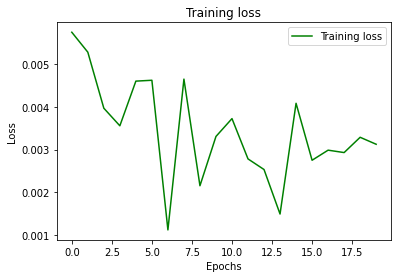

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

loss_train = history.history['loss']
epochs = range(0,20)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

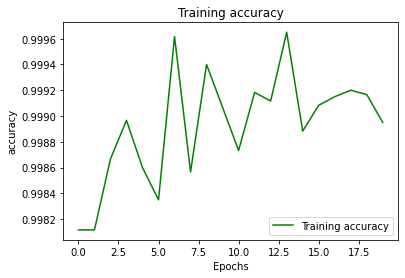

In [21]:
accuracy_train = history.history['accuracy']
epochs = range(0,20)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### Save model to json

In [22]:
classf = classifier.to_json()
with open("handWD.json", "w") as json_file:
    json_file.write(classf)
classifier.save_weights("handWDweights.h5")
print("model saved to ....")

model saved to ....
